
# Tutorial CasADi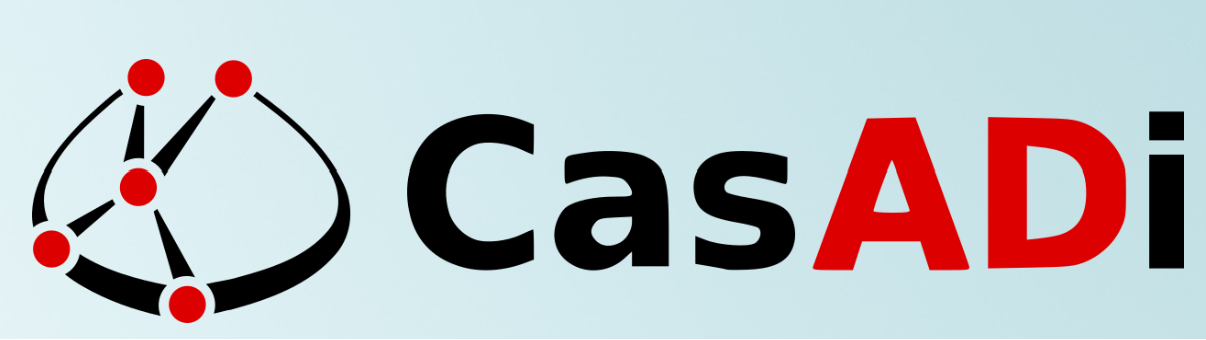

## Qué es CasADi?

CasADi es un open-source software framework para optimización no lineal y control óptimo. De especial interés en los problemas restringidos por ecuaciones diferenciales, es decir,
problemas de control óptimo. CasADi está escrito en C++ , pero es más conveniente utilizado a través de interfaces con todas las funciones para Python, MATLAB u Octave.

In [2]:
!pip install casadi
from casadi import *



## Lo básico de CasADi: Funciones y Expresiones

Variables tipo 'MX'. Son varaibles simbolicas que puede ser escalares, vectores o matrices.

$x$ \\
$y$ \\
$p = \begin{bmatrix}
		 p_1 \\
		p_2
	  \end{bmatrix} $ \\

$ A = \begin{bmatrix}
        a_1 & a_2 \\
        a_3 & a_4
	    \end{bmatrix} $

In [3]:
x = MX.sym("x")
y = MX.sym("y")      # scalar symbol
p = MX.sym("p",2);   A = MX.sym("A",2,2)  # vector and matrix symbol
print(A.shape)
print(p)


(2, 2)
p


## Lista de operaciones comunes

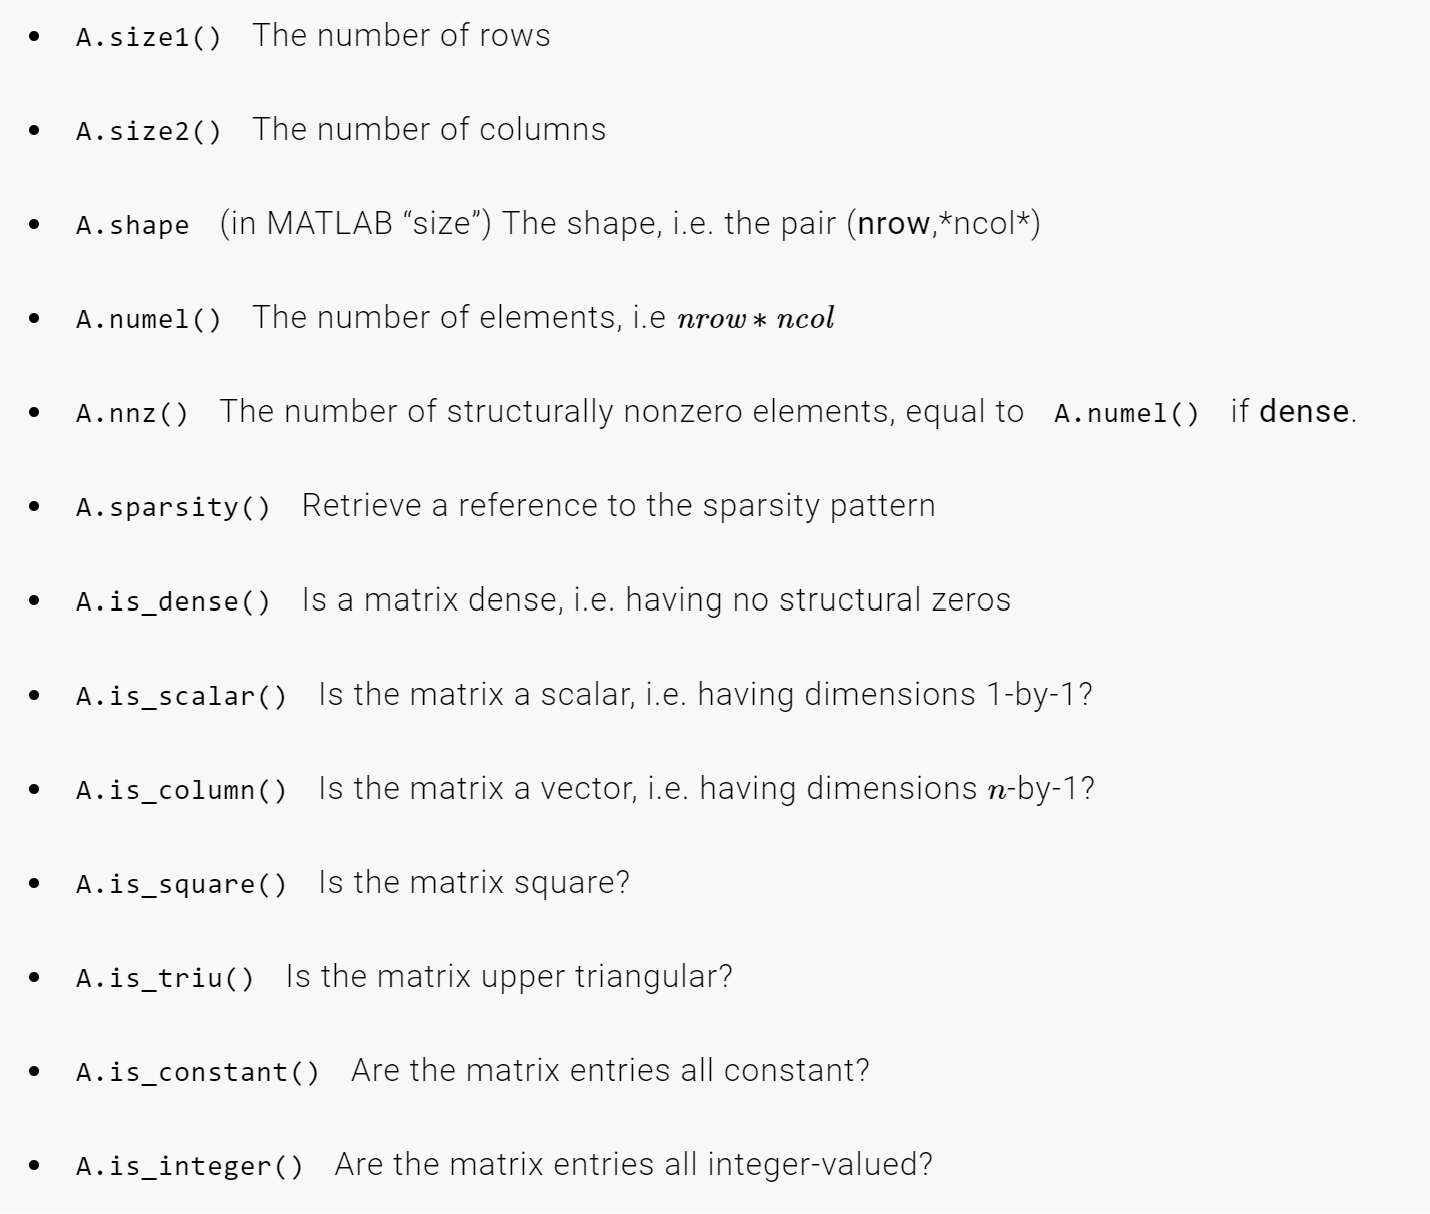

## Operaciones aritméticas y matriciales

$z = x + y $ \\
$w = xy+x$ \\
$A_1 = Ap$



In [8]:
z = x+y
print(z)
w = x*y+x
print(w)
A1 = A @ p
print(A1.shape)

(x+y)
((x*y)+x)
(2, 1)


## Funciones

$f(x,y) = sin(x)y$ \\
$g(x) =  \begin{bmatrix}
		\sqrt{x} \\
		x^2
	  \end{bmatrix} $  \\
$J(p,A) = p^\top A p $

In [10]:
f = Function("f",[x,y],[sin(x)*y])
g = Function("g",[x],[vertcat(sqrt(x),x**2)])
J = Function("J",[p,A],[p.T @ A @ p])

print(f)
print(g(4))
print(J)


f:(i0,i1)->(o0) MXFunction
[2, 16]
J:(i0[2],i1[2x2])->(o0) MXFunction


Cree las siguientes funciones y verifique su funcionamiento: \\
1. $h(w) = w^2 cos(w)$
2. $g_1(w,z,v)= \begin{bmatrix}
		\sqrt{w} \\
		wv+z \\
    cos(v)
	  \end{bmatrix}  $
3. $J_1 = x_1^\top Q x_1 + u^\top R u$  
Donde $Q$ es una matriz 3x3 y $R$ de 2x2

In [30]:
# Definir las variables simbolicas
w = MX.sym("w")
z = MX.sym("z")
v = MX.sym("v")
x1 = MX.sym("x1",3)
u = MX.sym("u",2)
Q = MX.sym("Q",3,3)
R = MX.sym("R",2,2)
# Crear las funciones
h = Function("h",[w],[sin(w)*w**2])
print(h)
g1 = Function("g1",[w,z,v],[vertcat(sqrt(w),w*v+z,cos(v))])
print(g1)
J1 = Function("J1",[x1,u,Q],[x1.T @ Q @ x1 + u.T @ R @ u])
print(J1)


h:(i0)->(o0) MXFunction
g1:(i0,i1,i2)->(o0[3]) MXFunction


RuntimeError: Error in Function::Function for 'J1' [MXFunction] at .../casadi/core/function.cpp:249:
.../casadi/core/function_internal.cpp:147: Error calling MXFunction::init for 'J1':
.../casadi/core/mx_function.cpp:409: J1::init: Initialization failed since variables [R] are free. These symbols occur in the output expressions but you forgot to declare these as inputs. Set option 'allow_free' to allow free variables.

## Calcular Gradiente ,Jacobiano , Hessiana

Podemos crear variables $f,f_1,f_2$ de forma simbolica para utilizar las funciones de CasADi (gradient(), hessian(), jacobian()) y realizar las operaciones.

$f = 100 (x_1 - x_2^2)^2 - (1-x_1)^2$ \\
$f_1 = x_1^2 + x_2^2$ \\
$f_2 = \begin{bmatrix}
		 x_1^2 + x_2^2 \\
		x_2^2
	  \end{bmatrix} $ \\




In [32]:
x = MX.sym('x',2)


f = 100*(x[1]-x[0]**2)**2 - (1 - x[0])**2
f1 = x[0]**2 + x[1]**2
f2 = vertcat(x[0]**2 + x[1]**2, x[1]**2)


FG = Function('FG', [x],[gradient(f,x)])
FH = Function('FH',[x], [hessian(f1,x)[0]])
FJ = Function('JH',[x], [jacobian(f2,x)])


x_val = [1,1]
print((FH(x_val)))





[[2, 00], 
 [00, 2]]


## Plantear un problema de Optimización en CasADi




 \begin{equation}
\begin{array}{cl}
\underset{x \in \mathbb{R}^2 }{\text{minimize}}  & f = x_1^2 + x_2^2 \\\\
\text{subject to}
& x_1 + x_2 - 1 \geq 0\\\\
\end{array}
\end{equation}



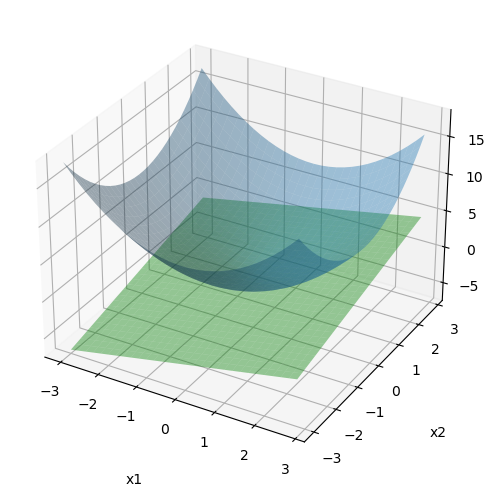

In [33]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')

x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-3, 3, 0.2)

X1, X2 = np.meshgrid(x1, x2)
Z = X1**2 + X2**2
Z2 = X1 + X2 - 1

#ax.scatter(0.5,0.5,0.5**2+0.5**2, color='red', s=50)
ax.plot_surface(X1, X2, Z, alpha = 0.4)
ax.plot_surface(X1, X2, Z2, alpha = 0.4, color = 'green')


# Set axes label
ax.set_xlabel('x1', labelpad=20)
ax.set_ylabel('x2', labelpad=20)
ax.set_zlabel('f', labelpad=20)


plt.show()

In [36]:

opti = Opti()

x1 = opti.variable()
x2 = opti.variable()

opti.minimize(  x1**2 + x2**2  )
opti.subject_to(       x1 + x2 >=1 )
opti.subject_to(       x1  >=2 )

opti.solver('sqpmethod')
opti.set_initial(x1, 0)
opti.set_initial(x2, 0)


sol = opti.solve()

print(sol.value(x1))
print(sol.value(x2))


qpOASES -- An Implementation of the Online Active Set Strategy.
Copyright (C) 2007-2015 by Hans Joachim Ferreau, Andreas Potschka,
Christian Kirches et al. All rights reserved.

qpOASES is distributed under the terms of the 
GNU Lesser General Public License 2.1 in the hope that it will be 
useful, but WITHOUT ANY WARRANTY; without even the implied warranty 
of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. 
See the GNU Lesser General Public License for more details.

-------------------------------------------
This is casadi::Sqpmethod.
Using exact Hessian
Number of variables:                               2
Number of constraints:                             2
Number of nonzeros in constraint Jacobian:         3
Number of nonzeros in Lagrangian Hessian:          2

iter      objective    inf_pr    inf_du     ||d||  lg(rg) ls    info
   0   0.000000e+00  2.00e+00  0.00e+00  0.00e+00       -  0  - 


####################   qpOASES  --  QP NO.   1   #####################

    Iter

 ## Resuelva el siguiente problema utilizando CasADi

 \begin{equation}
\begin{array}{cl}
\underset{x \in \mathbb{R}^2 }{\text{minimize}}  & f = 100 (x_1 - x_2^2)^2 - (1-x_1)^2 \\\\
\text{subject to}
& x_1^2 + x_2^2 -2 = 0\\\\
\end{array}
\end{equation}



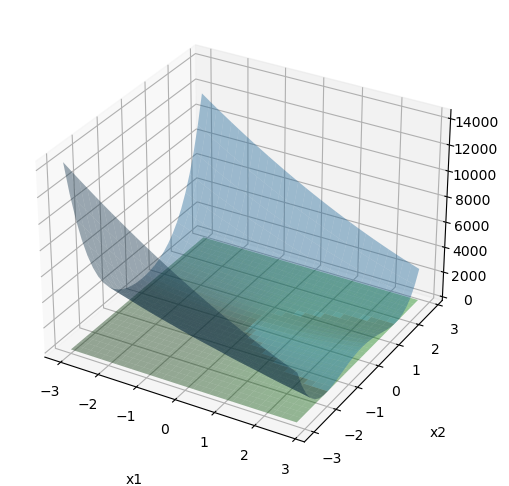

In [35]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')

x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-3, 3, 0.2)

X1, X2 = np.meshgrid(x1, x2)
Z = 100* (X1-X2**2)**2 - (1-X1)**2
Z2 = X1**2+X2**2 - 2

ax.plot_surface(X1, X2, Z, alpha = 0.4)
ax.plot_surface(X1, X2, Z2, alpha = 0.4, color = 'green')


# Set axes label
ax.set_xlabel('x1', labelpad=20)
ax.set_ylabel('x2', labelpad=20)
ax.set_zlabel('f', labelpad=20)


plt.show()

In [40]:
# Crear la varible opti para definir el problema
opti = Opti()
# Definir las varaibles de optimizacion
x1 = opti.variable()
x2 = opti.variable()
# Definir la funcion objetivo

opti.minimize(  100*(x1-x2**2)**2-(1-x1)**2 )
# Definir las restricciones
opti.subject_to( x1**2 + x2**2 ==2)
# Seleccionar el solver
opti.solver('ipopt')
# Especificar el punto de partida
opti.set_initial(x1, 0)
opti.set_initial(x2, 0)
# Solucionar el problema
sol = opti.solve()

# Imprimir en pantalla la solucion
print('x1',sol.value(x1))
print('x2',sol.value(x2))

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e+00 2.00e+00 2.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

\begin{equation}
\begin{array}{cl}
\underset{x \in \mathbb{R}^2 }{\text{minimize}}  & f = e^{x_1}(4x_1^2 + 2 x_2^2 + 4 x_1x_2 + 2x_2) \\\\
\text{subject to}
& \frac{x_1x_2}{2} + (x_1 + 2)^2 + \frac{(x_2-2)^2}{2}\leq 2
\end{array}
\end{equation}

Ajuste inicialmente como $x_0 = (-1,1)$ y luego $x_0 = (-3,3)$.

Que soluciones obtiene?

In [46]:
# Resuelva el problema
# Crear la varible opti para definir el problema
opti = Opti()
# Definir las varaibles de optimizacion
x1 =opti.variable()
x2 =opti.variable()
# Definir la funcion objetivo
opti.minimize(np.e**(x1)+2*x1**2+2*x2**2+4*x1*x2+2*x2)
# Definir las restricciones
opti.subject_to((x1*x2/2)+(x1+2)**2+(x2-2)**2/2 <= 2)

# Seleccionar el solver
opti.solver('ipopt')
# Especificar el punto de partida
opti.set_initial(x1, -1)
opti.set_initial(x2, 1)
# Solucionar el problema
sol = opti.solve()
# Imprimir en pantalla la solucion
print('x1',sol.value(x1))
print('x2',sol.value(x2))

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.3678794e+00 0.00e+00 1.51e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

## Problemas con sistemas dinamicos
\begin{equation}
\begin{array}{cl}
\underset{x(.)}{\text{minimize}}  & J(k) = \sum\limits_{k=0}^{N-1} (x_1(k)-x_{1ref})^2 + (x_2(k)-x_{2ref})^2  \\\\
\text{subject to}
& x(k+1) = f(x(k),u(k)) \\\\
&-3 \le x_1 \le 3 \\
&-3 \le x_2 \le 3 \\
&-3 \le x_3 \le 3 \\
&-3 \le x_4 \le 3 \\
&-10 \le u_1 \le 10 \\
&-10 \le u_2 \le 10 \\\\
\end{array}
\end{equation}
$f(x(k),u(k)) \to\begin{bmatrix}
		x_1 (k+1)\\
		x_2 (k+1)\\
    x_3 (k+1)\\
    x_4 (k+1)
	  \end{bmatrix}=\begin{bmatrix}
		x_3(k)\\
    x_4(k) \\
    u_1(k) \\
    u_2(k)
	  \end{bmatrix}$

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      284
Number of nonzeros in inequality constraint Jacobian.:      124
Number of nonzeros in Lagrangian Hessian.............:       42

Total number of variables............................:      124
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       84
Total number of inequality constraints...............:      124
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:      124
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.1000000e+01 1.00e+00 3.30e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

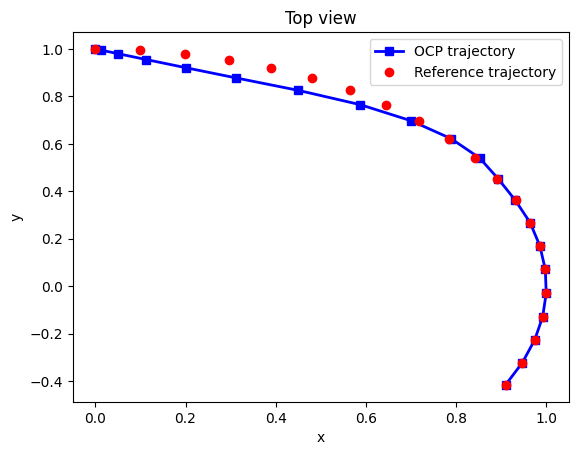

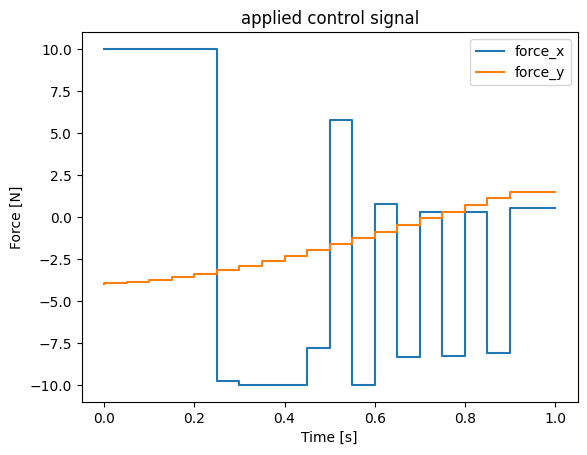

In [ ]:
from pylab import *
from casadi import *

# Physical constants

T = 1.0 # control horizon [s]
N = 20 # Number of control intervals

dt = T/N # length of 1 control interval [s]

tgrid = np.linspace(0,T,N+1)

##
# ----------------------------------
#    continuous system dot(x)=f(x,u)
# ----------------------------------
nx = 4

# Construct a CasADi function for the ODE right-hand side
x = MX.sym('x',nx) # states: pos_x [m], pos_y [m], vel_x [m/s], vel_y [m/s]
u = MX.sym('u',2) # control force [N]
rhs = vertcat(x[2:4],u)

# Continuous system dynamics as a CasADi Function
f = Function('f', [x, u], [rhs])


##
# -----------------------------------
#    Discrete system x_next = F(x,u)
# -----------------------------------

k1 = f(x, u)
k2 = f(x + dt/2 * k1, u)
k3 = f(x + dt/2 * k2, u)
k4 = f(x + dt * k3, u)
xf = x+dt/6*(k1 +2*k2 +2*k3 +k4)

F = Function('F', [x, u], [xf])

##
# ------------------------------------------------
# Waypoints
# ------------------------------------------------

ref = horzcat(sin(np.linspace(0,2,N+1)),cos(np.linspace(0,2,N+1))).T

##
# -----------------------------------------------
#    Optimal control problem, multiple shooting
# -----------------------------------------------

opti = casadi.Opti()

# Decision variables for states
X = opti.variable(nx,N+1)
# Decision variables for control vector
U =  opti.variable(2,N) # force [N]

# Gap-closing shooting constraints
for k in range(N):
  opti.subject_to(X[:,k+1]==F(X[:,k],U[:,k]))

# Path constraints
opti.subject_to(opti.bounded(-3,X[0,:],3)) # pos_x limits
opti.subject_to(opti.bounded(-3,X[1,:],3)) # pos_y limits
opti.subject_to(opti.bounded(-3,X[2,:],3)) # vel_x limits
opti.subject_to(opti.bounded(-3,X[3,:],3)) # vel_y limits
opti.subject_to(opti.bounded(-10,U[0,:],10)) # force_x limits
opti.subject_to(opti.bounded(-10,U[1,:],10)) # force_x limits

# Initial constraints
opti.subject_to(X[:,0]==vertcat(ref[:,0],0,0))

# Try to follow the waypoints
opti.minimize(sumsqr(X[:2,:]-ref))

opti.solver('ipopt')

sol = opti.solve()

##
# -----------------------------------------------
#    Post-processing: plotting
# -----------------------------------------------

xsol = sol.value(X)
usol = sol.value(U)

figure()
plot(xsol[0,:].T,xsol[1,:].T,'bs-',linewidth=2)
plot(ref[0,:].T,ref[1,:].T,'ro',linewidth=3)
legend(('OCP trajectory','Reference trajectory'))
title('Top view')
xlabel('x')
ylabel('y')
figure()
step(tgrid,horzcat(usol,usol[:,-1]).T)
title('applied control signal')
legend(('force_x','force_y'))
ylabel('Force [N]')
xlabel('Time [s]')
show()